In [8]:
import nsim
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [9]:
## Create a function to plot heat maps here
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

In [10]:
### Simulate the data here
number_of_nodes = 4 # Change this number to reflect the number of electrodes
nodes = [nsim.models.JansenRit() for i in range(number_of_nodes)] # four nodes in the network

num_vects= number_of_nodes
vals=[]
for _ in range(num_vects):
    vals.append(np.random.normal(size=num_vects))

    
network = np.cov(vals)
np.fill_diagonal(network, 0)
network = network*.1
model = nsim.NetworkModel(nodes, network)
sim = nsim.Simulation(model, T=600.0)

In [11]:
## View the weighted directed graph
print(network)

## Now print the corellation between these values


[[ 0.         -0.09315768  0.05897344 -0.05622896]
 [-0.09315768  0.         -0.04609595  0.03351346]
 [ 0.05897344 -0.04609595  0.         -0.028915  ]
 [-0.05622896  0.03351346 -0.028915    0.        ]]


/home/arosen/anaconda3/lib/python3.7/site-packages/nsim/analyses1/plots.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


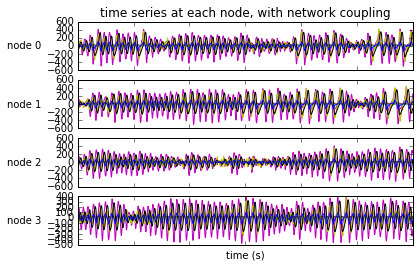

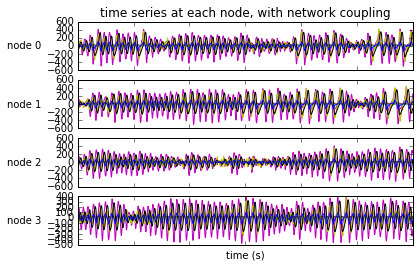

In [12]:
## This is where the data will be generated
model = nsim.NetworkModel(nodes, network)
sim = nsim.Simulation(model, T=6.0)
sim.timeseries.plot(title='time series at each node, with network coupling')

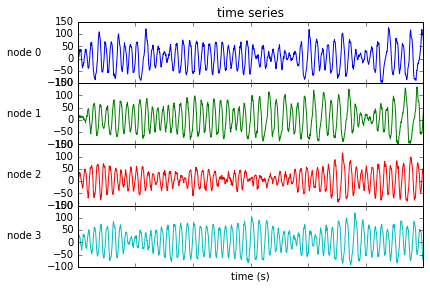

In [13]:
## Now take the mean within node
mean_time = np.mean(sim.timeseries, axis=1)
mean_time.plot()
mean_time = pd.DataFrame(mean_time)

In [14]:
corr = mean_time.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3
0,1,-0.344697,0.511564,-0.449204
1,-0.344697,1,-0.257966,0.423559
2,0.511564,-0.257966,1,-0.551472
3,-0.449204,0.423559,-0.551472,1
